In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Pre-Processing</h1>

In [2]:
# Load the data

df = pd.read_csv('spam.csv', encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# replace ham in coloumn label with 0 and spam with 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()
df.duplicated().sum()

403

In [6]:
df = df.drop_duplicates(keep= 'first')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


<h1>EDA</h1>

label
0    4516
1     653
Name: count, dtype: int64

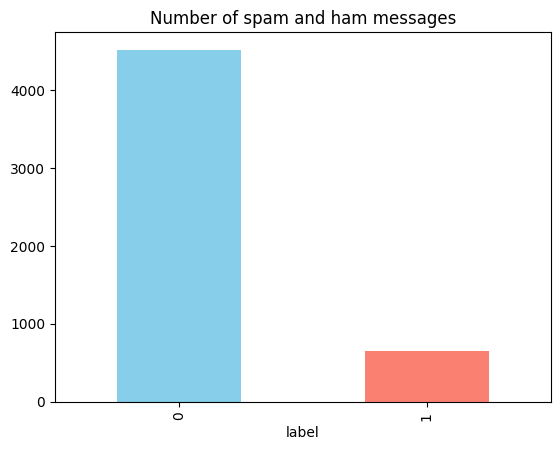

In [8]:
# Data Visualization
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon']), plt.title('Number of spam and ham messages')
df['label'].value_counts()

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rakesh Kumar
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df['num_char'] = df['message'].str.len()
df.head()

,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [12]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


,num_words,num_char,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


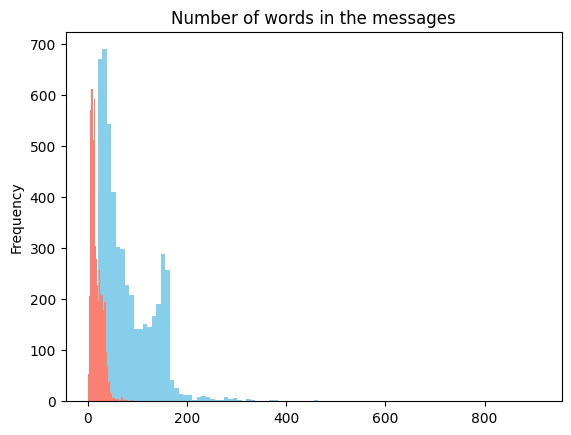

In [13]:
df['num_char'].plot(kind='hist', bins=100, color='skyblue'), plt.title('Number of characters in the messages')
df['num_words'].plot(kind='hist', bins=100, color='salmon'), plt.title('Number of words in the messages')
df[['num_words','num_char','num_sentences']].describe()

(<Axes: title={'center': 'Number of words in spam messages'}, xlabel='num_words', ylabel='Count'>,
 Text(0.5, 1.0, 'Number of words in spam messages'))

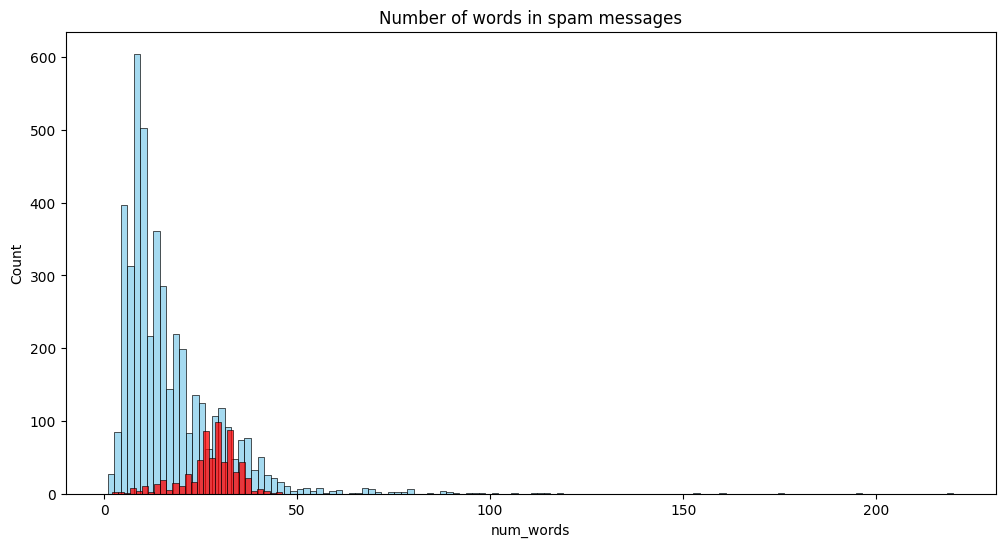

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='skyblue'), plt.title('Number of words in ham messages')
sns.histplot(df[df['label'] == 1]['num_words'], color='red'), plt.title('Number of words in spam messages')

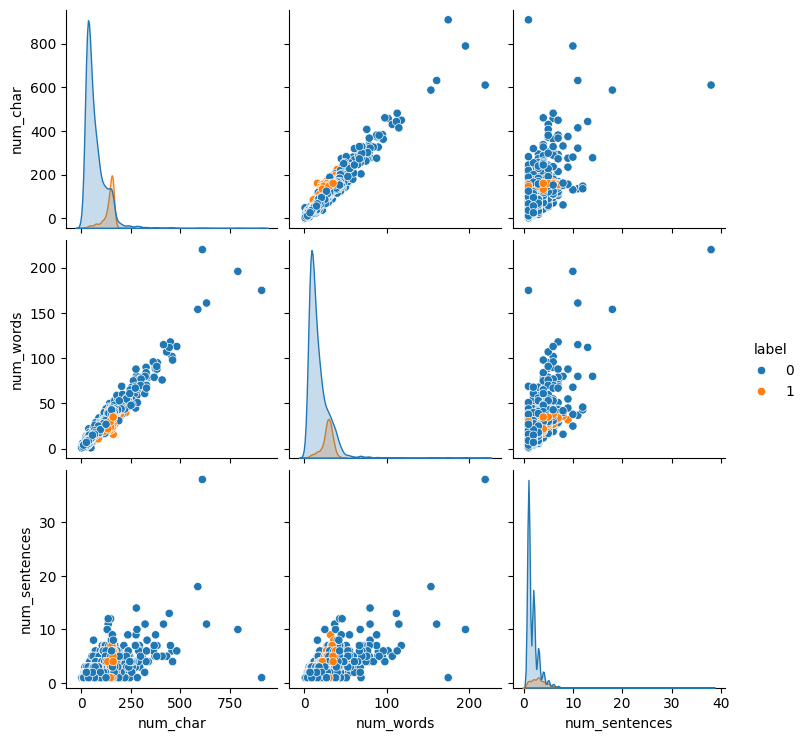

In [15]:
sns.pairplot(df, hue='label')

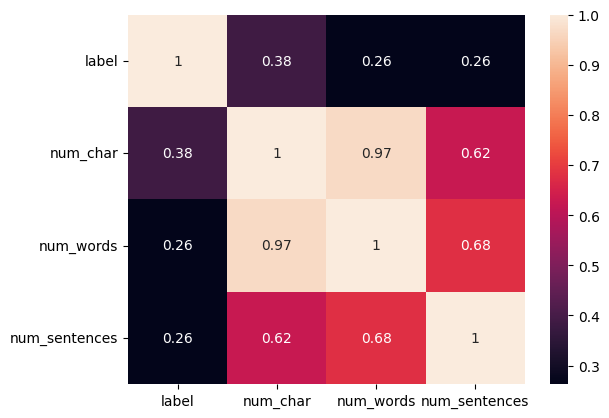

In [16]:
#make new dataframe remove coloumb message
df_new = df.drop(['message'], axis=1)
df_new.head()
sns.heatmap(df_new.corr(), annot=True)
#delete df_new
del df_new

<h1>Text Processing</h1>
<ul>
    <li>Convert to lowercase</li>
    <li>Tokenization</li>
    <li>Removing special character</li>
    <li>Removing stopwor and punctuation</li>
    <li>Stemming</li>
</ul>

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rakesh Kumar
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

In [19]:
def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in set(stopwords.words('english'))]
    text = [ps.stem(word) for word in text if word.isalnum()]
    text = ' '.join(text)
    return text

In [21]:
df['trns_msg'] = df['message'].apply(clean_text)
df.head()

,label,message,num_char,num_words,num_sentences,trns_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [20]:
clean_text('I am learning Python and I am learning Python??')

'learn python learn python'

(<matplotlib.image.AxesImage at 0x1619edfc910>,
 Text(0.5, 1.0, 'Ham messages word cloud'))

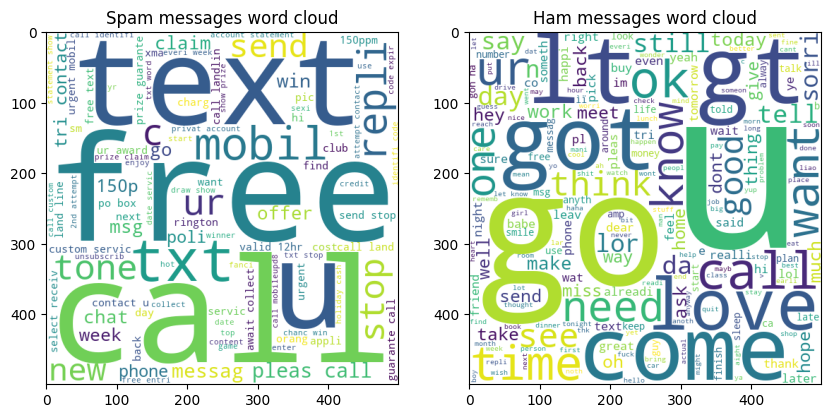

In [110]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
spam_wc = wc.generate(df[df['label'] == 1]['trns_msg'].str.cat(sep=' '))
plt.imshow(spam_wc), plt.title('Spam messages word cloud')
plt.subplot(1, 2, 2)
ham_wc = wc.generate(df[df['label'] == 0]['trns_msg'].str.cat(sep=' '))
plt.imshow(ham_wc), plt.title('Ham messages word cloud')


In [25]:
from collections import Counter

In [26]:
spam_list = df[df['label'] == 1]['trns_msg'].str.cat(sep=' ').split()
print(spam_list)
len(spam_list)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

9939

C:\Users\Rakesh Kumar Singh\AppData\Local\Temp\ipykernel_18428\691332490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = pd.DataFrame(Counter(spam_list).most_common(30)),x = pd.DataFrame(Counter(spam_list).most_common(30))[0],  y =pd.DataFrame(Counter(spam_list).most_common(30))[1], palette='Reds_r'), plt.title('Top 30 spam words')


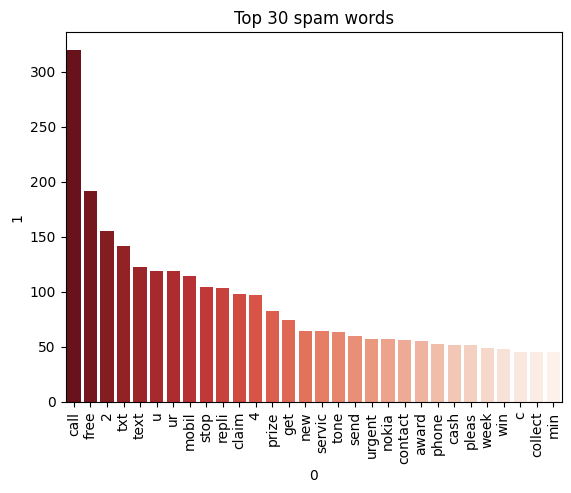

In [27]:
sns.barplot(data = pd.DataFrame(Counter(spam_list).most_common(30)),x = pd.DataFrame(Counter(spam_list).most_common(30))[0],  y =pd.DataFrame(Counter(spam_list).most_common(30))[1], palette='Reds_r'), plt.title('Top 30 spam words')
plt.xticks(rotation=90)
plt.show()

C:\Users\Rakesh Kumar Singh\AppData\Local\Temp\ipykernel_18428\2110247060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = pd.DataFrame(Counter(ham_list).most_common(30)),x = pd.DataFrame(Counter(ham_list).most_common(30))[0],  y =pd.DataFrame(Counter(ham_list).most_common(30))[1], palette='Blues_r'), plt.title('Top 30 ham words'),plt.ylabel('Count'),plt.xlabel('Words')


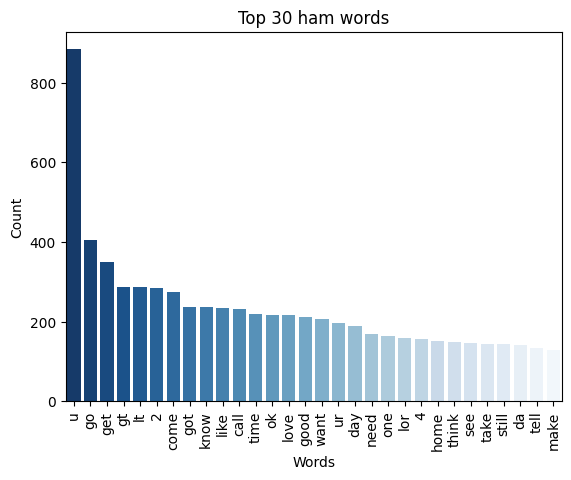

In [28]:
ham_list = df[df['label'] == 0]['trns_msg'].str.cat(sep=' ').split()
len(ham_list)
sns.barplot(data = pd.DataFrame(Counter(ham_list).most_common(30)),x = pd.DataFrame(Counter(ham_list).most_common(30))[0],  y =pd.DataFrame(Counter(ham_list).most_common(30))[1], palette='Blues_r'), plt.title('Top 30 ham words'),plt.ylabel('Count'),plt.xlabel('Words')
plt.xticks(rotation=90)
plt.show()

<h1>Model Building</h1>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [30]:
X = tfidf.fit_transform(df['trns_msg']).toarray()

In [31]:
y = df['label'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [35]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [36]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [96]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [97]:
import pickle

In [98]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [ ]:
X